# Wine Quality Prediction – Machine Learning
- Name: Brian Andres Lopez Castro  
- Date: May 26, 2024

This project performs **data analysis and predictive modeling** on red and white wine datasets using physicochemical parameters such as acidity, alcohol, and residual sugar.  
The goal is to evaluate how well **Decision Tree** and **Random Forest** algorithms can predict wine quality based on these measurable chemical features.

## 📂 Datasets
- **White Wine:** [Wine Quality Dataset – White Wine](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset)  
- **Red Wine:** [Red Wine Quality Dataset](https://www.kaggle.com/code/nimapourmoradi/red-wine-quality)


## 1. Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Load dataset of red wine samples
dataR = pd.read_csv('winequality-red.csv', sep=';')  # CSV file with semicolon separator

# Load dataset of white wine samples
dataW = pd.read_csv('winequality-white.csv', sep=';')  # CSV file with semicolon separator

## 2. EDA

In [2]:
dataW.describe()  # white wine dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [3]:
dataR.describe() # red wine dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
# Boxplots to detect outliers and visualize numerical variable distributions
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore common Seaborn warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

# Function to plot distribution and boxplot for each numerical variable
def plot_numerical(df, figsize=(10, 10)):
    columns = df.columns.tolist()
    _, axs = plt.subplots(len(columns), 2, figsize=figsize)

    for idx, column in enumerate(columns):
        # Distribution (histogram) of data
        sns.histplot(
            x=df[column],
            kde=False,
            color='#65b87b', alpha=.7,
            ax=axs[idx][0]
        )

        # Boxplot to visualize potential outliers
        sns.boxplot(
            x=df[column],
            color='#6fb9bd',
            ax=axs[idx][1]
        )

# Function to plot categorical variable distributions
def plot_categorical(df, figsize=(10, 10)):
    num_columns = len(df.columns)
    num_rows = num_columns // 2 + num_columns % 2  # Calculate number of rows

    fig, axs = plt.subplots(num_rows, 2, figsize=figsize)
    axs = axs.flatten()  # Flatten axis array for easier iteration

    for i, column in enumerate(df.columns):
        sns.countplot(
            x=df[column],
            color='#6fb9bd',
            ax=axs[i]
        )
        axs[i].set_title(f'Count of {column}')
        axs[i].set_xlabel(column)
        axs[i].set_ylabel('Count')

    # Hide any unused subplots
    for j in range(i + 1, len(axs)):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()

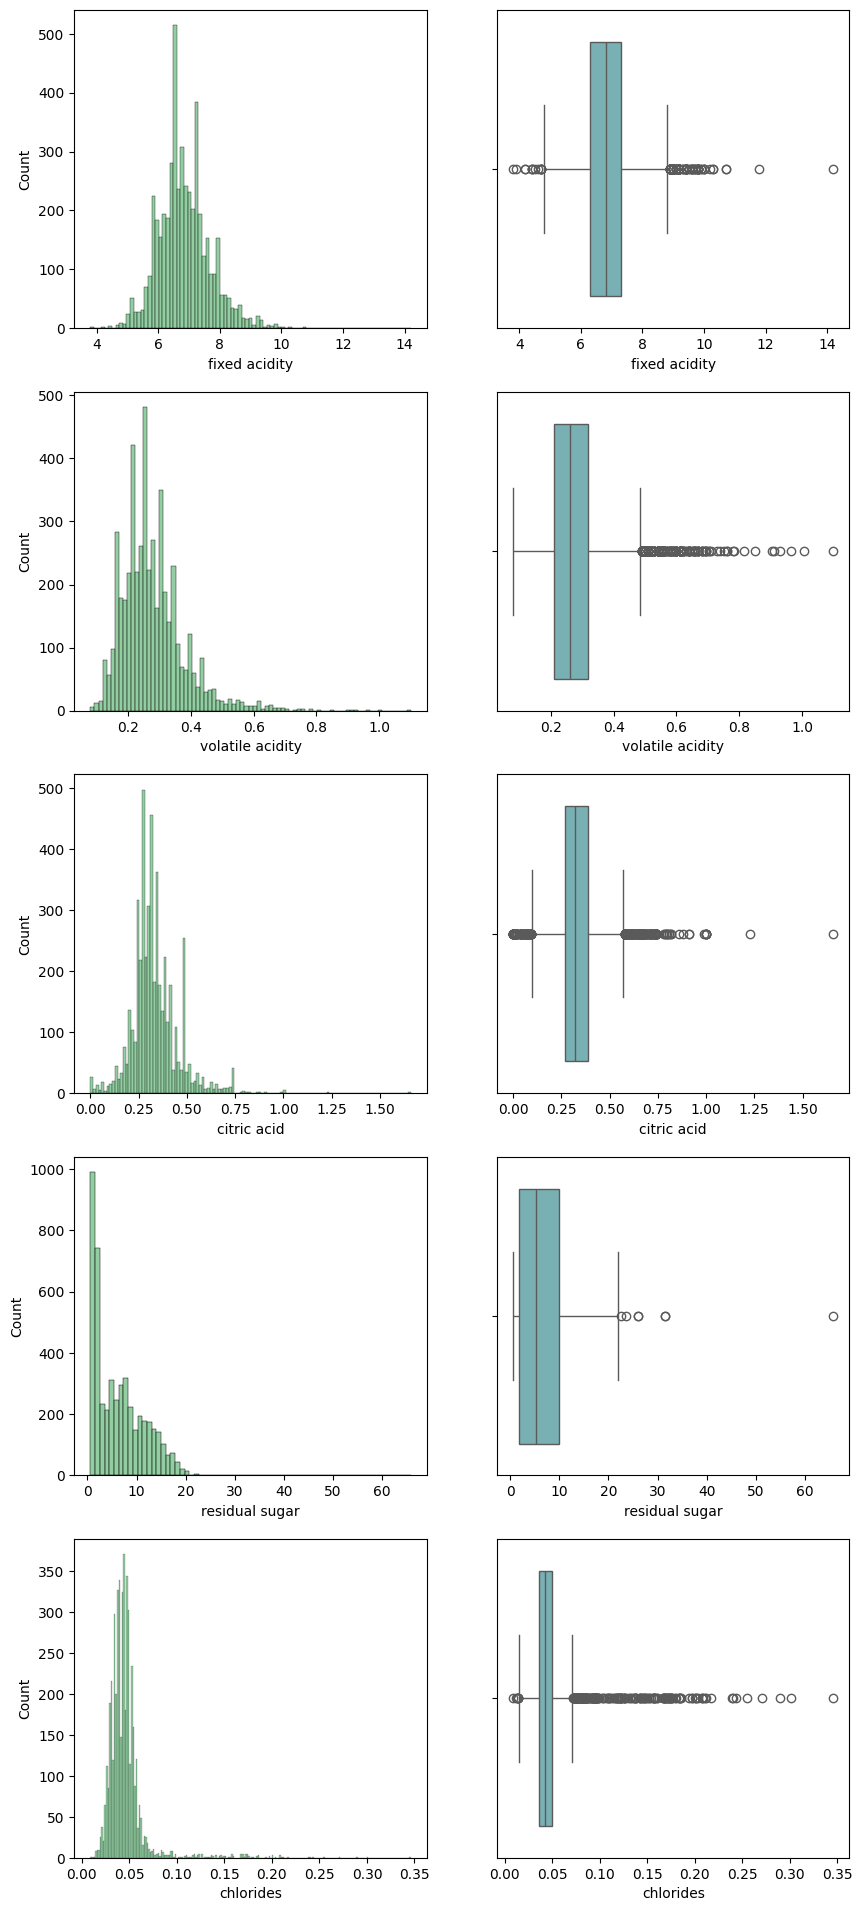

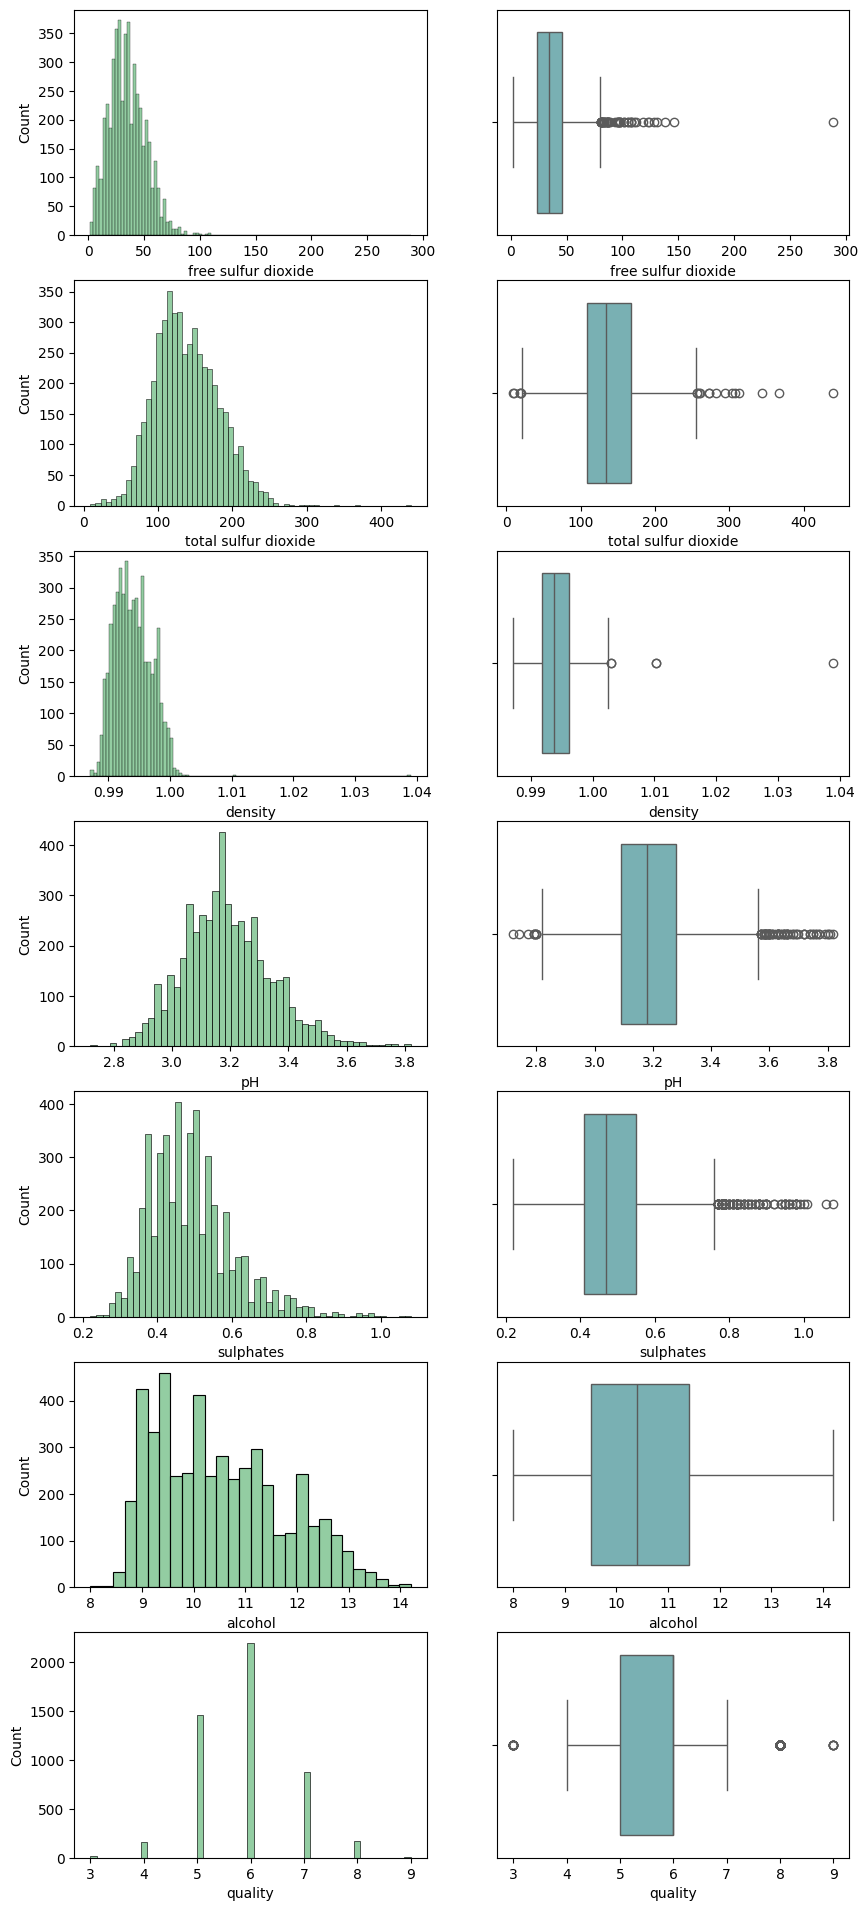

In [5]:
plot_numerical(dataW[['fixed acidity','volatile acidity','citric acid', 'residual sugar', 'chlorides']], figsize=(10, 24))
plot_numerical(dataW[['free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']], figsize=(10, 24))

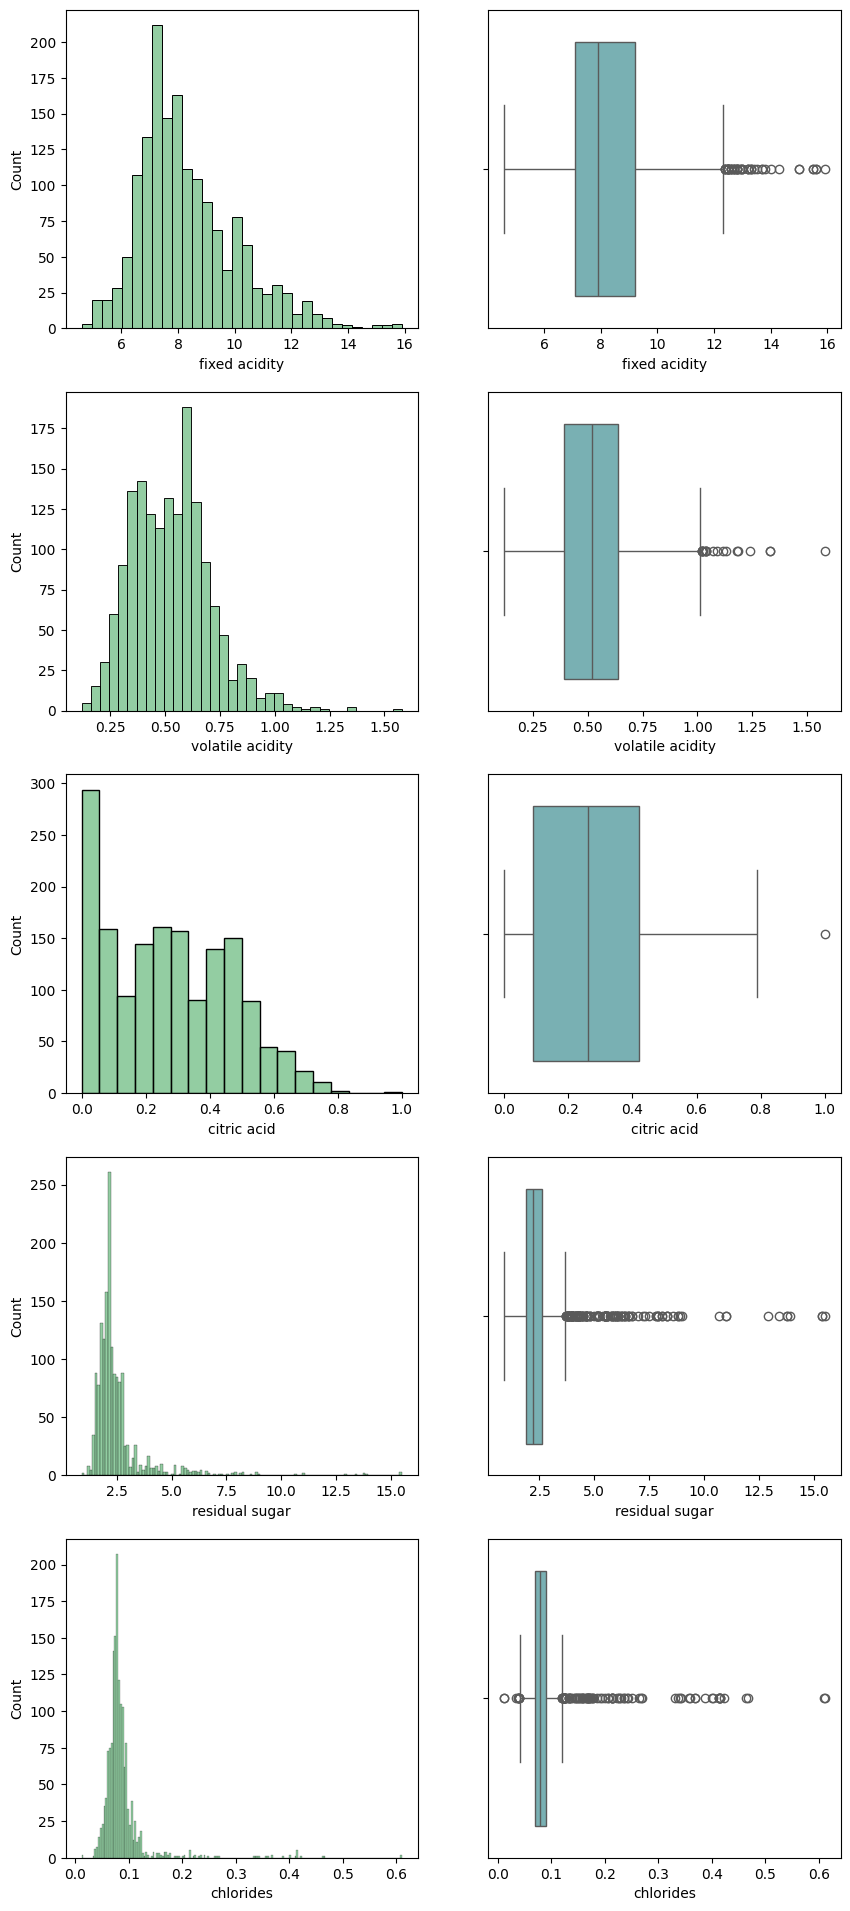

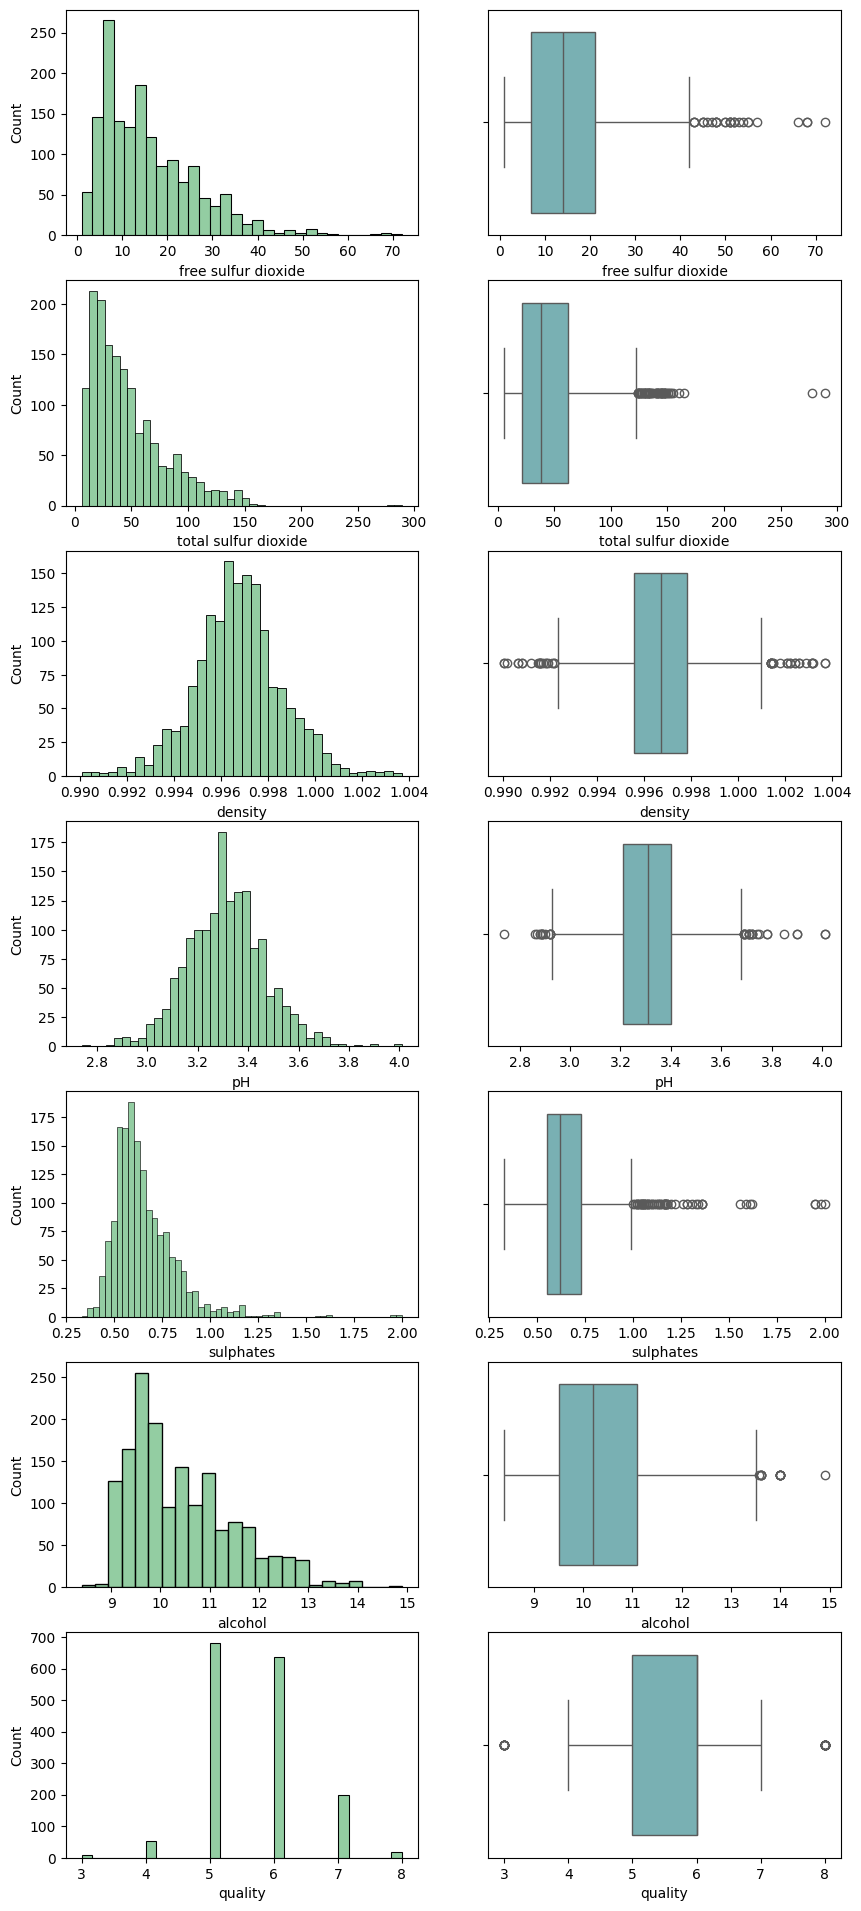

In [6]:
plot_numerical(dataR[['fixed acidity','volatile acidity','citric acid', 'residual sugar', 'chlorides']], figsize=(10, 24))  # Visualizar
plot_numerical(dataR[['free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']], figsize=(10, 24))  # Visualizar

<Axes: >

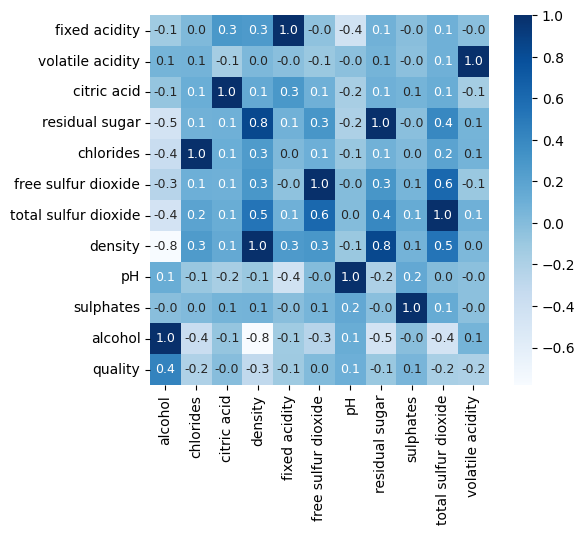

In [7]:
# Correlation Analysis – White Wine
correlation = dataW.corr()

# Exclude the 'quality' column to analyze correlations between other variables
corrX = correlation[correlation.columns.difference(['quality'])]

# Heatmap visualization of the correlation matrix
sns.heatmap(
    corrX,
    cbar=True,
    square=True,
    fmt='.1f',
    annot=True,
    annot_kws={'size': 9},
    cmap='Blues'
)

<Axes: >

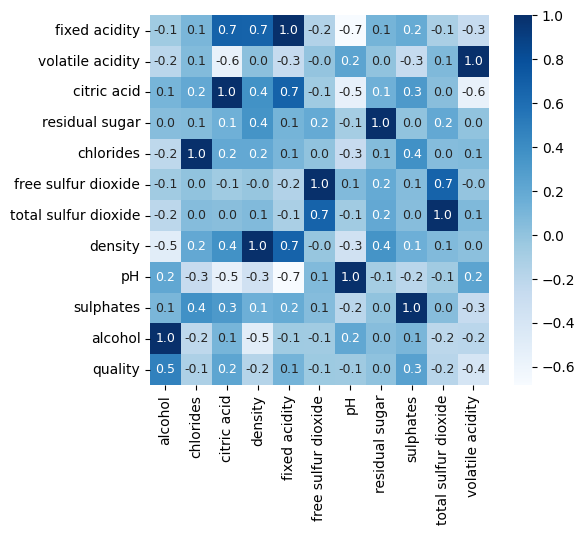

In [8]:
# Correlation Analysis – Red Wine
correlation = dataR.corr()

# Exclude the 'quality' column to analyze correlations between other variables
corrX = correlation[correlation.columns.difference(['quality'])]

# Heatmap visualization of the correlation matrix
sns.heatmap(
    corrX,
    cbar=True,
    square=True,
    fmt='.1f',
    annot=True,
    annot_kws={'size': 9},
    cmap='Blues'
)

## 3. Data Preparation

### Data Scaling with StandardScaler

In [9]:
# DATA SCALING
from sklearn.preprocessing import StandardScaler
from joblib import dump

# Columns to be scaled
x_columns = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
    'density', 'pH', 'sulphates', 'alcohol', 'quality'
]

# Select variables for white and red wine datasets
XW = dataW[x_columns]  # White wine variables
XR = dataR[x_columns]  # Red wine variables

# Initialize and fit the scaler
scalerWHITE = StandardScaler().fit(XW)
scalerRED = StandardScaler().fit(XR)

# Apply scaling to both datasets
XW_scaled = scalerWHITE.transform(XW)   # Scaled white wine data
XR_scaled = scalerRED.transform(XR)     # Scaled red wine data

# Display mean and variance of the scaled red wine data
print('Mean:', XR_scaled.mean(), '\tStandard deviation:', XR_scaled.std())


Mean: -2.5269666608437166e-15 	Standard deviation: 1.0


### Transformation of Scaled Data into DataFrames

In [10]:
XW_scaled= pd.DataFrame(XW_scaled,columns=x_columns)

XR_scaled= pd.DataFrame(XR_scaled,columns=x_columns)

# 4. Predictive Analysis

### Decision Tree

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, root_mean_squared_error


def apply_decision_tree(df, outlier_columns, target_col, model_type='regression'):
    """
    Apply a Decision Tree (regressor or classifier) to a DataFrame.

    Parameters
    ----------
    df : pandas.DataFrame
        Input dataset.
    outlier_columns : list of str
        Columns that contain outliers (currently not modified; placeholder for future treatment).
    target_col : str
        Name of the target column.
    model_type : {'regression', 'classification'}, default='regression'
        Whether to train a DecisionTreeRegressor or DecisionTreeClassifier.

    Returns
    -------
    model : DecisionTreeRegressor or DecisionTreeClassifier
        Trained decision tree model.
    metric : float
        Evaluation metric on the test set:
        - RMSE (float) for regression
        - Accuracy (float) for classification
    """
    # Handle outliers in specified columns (currently not implemented)
    df_processed = df

    # Split into features (X) and target (y)
    X = df_processed.drop(columns=[target_col])
    y = df_processed[target_col]

    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=50
    )

    # Train a decision tree regressor or classifier
    if model_type == 'regression':
        dt_model = DecisionTreeRegressor(random_state=50)
        dt_model.fit(X_train, y_train)
        y_pred = dt_model.predict(X_test)
        # Evaluate model performance (RMSE)
        metric = root_mean_squared_error(y_test, y_pred)

    elif model_type == 'classification':
        dt_model = DecisionTreeClassifier(random_state=42)
        dt_model.fit(X_train, y_train)
        y_pred = dt_model.predict(X_test)
        # Evaluate model performance (Accuracy)
        metric = accuracy_score(y_test, y_pred)

    else:
        raise ValueError("Parameter 'model_type' must be 'regression' or 'classification'.")

    return dt_model, metric


# Example usage configuration
outlier_columns = [
    'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
    'sulphates', 'alcohol'
]

target_col = 'quality'

### Random Forest

In [25]:
# RANDOM FOREST
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, root_mean_squared_error


def apply_random_forest(df, outlier_columns, target_col, model_type='regression'):
    """
    Apply a Random Forest model (regressor or classifier) to a DataFrame.

    Parameters
    ----------
    df : pandas.DataFrame
        Input dataset.
    outlier_columns : list of str
        Columns that contain outliers (currently not modified; placeholder for future treatment).
    target_col : str
        Name of the target column.
    model_type : {'regression', 'classification'}, default='regression'
        Whether to train a RandomForestRegressor or RandomForestClassifier.

    Returns
    -------
    model : RandomForestRegressor or RandomForestClassifier
        Trained Random Forest model.
    metric : float
        Evaluation metric on the test set:
        - RMSE (float) for regression
        - Accuracy (float) for classification
    """
    seed_value = 50

    # Handle outliers in the specified columns (currently not implemented)
    df_processed = df

    # Split into features (X) and target (y)
    X = df_processed.drop(columns=[target_col])
    y = df_processed[target_col]

    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=seed_value
    )

    # Select and train the Random Forest model
    if model_type == 'regression':
        rf_model = RandomForestRegressor(
            n_estimators=100,
            criterion="squared_error",
            max_depth=1,
            min_samples_split=4,
            min_samples_leaf=2,
        )

        rf_model.fit(X_train, y_train)
        y_pred = rf_model.predict(X_test)
        # Evaluate model performance (RMSE)
        metric = root_mean_squared_error(y_test, y_pred)

    elif model_type == 'classification':
        rf_model = RandomForestClassifier(random_state=30)
        rf_model.fit(X_train, y_train)
        y_pred = rf_model.predict(X_test)
        # Evaluate model performance (Accuracy)
        metric = accuracy_score(y_test, y_pred)

    else:
        raise ValueError("Parameter 'model_type' must be 'regression' or 'classification'.")

    return rf_model, metric


# Example configuration
outlier_columns = [
    'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
    'sulphates', 'alcohol'
]
target_col = 'quality'

# 5. Evaluation

### Decision Tree

In [27]:
from sklearn.metrics import root_mean_squared_error

trained_model, metric = apply_decision_tree(XW_scaled, outlier_columns, target_col, model_type='regression')
print("Evaluation Metric - Decision Tree for White Wine (RMSE):", metric)

Evaluation Metric - Decision Tree for White Wine (RMSE): 0.95233811253991


In [29]:
from sklearn.metrics import root_mean_squared_error

trained_model, metric = apply_decision_tree(XR_scaled, outlier_columns, target_col, model_type='regression')
print("Evaluation Metric - Decision Tree for Red Wine (RMSE):", metric)

Evaluation Metric - Decision Tree for Red Wine (RMSE): 0.91862299658413


### Random Forest

In [30]:
from sklearn.metrics import root_mean_squared_error

trained_model, metric = apply_random_forest(XW_scaled, outlier_columns, target_col, model_type='regression')
print("Evaluation Metric - Random Forest for White Wine (RMSE):", metric)

Evaluation Metric - Random Forest for White Wine (RMSE): 0.8578880586981925


In [31]:
from sklearn.metrics import root_mean_squared_error

trained_model, metric = apply_random_forest(XR_scaled, outlier_columns, target_col, model_type='regression')
print("Evaluation Metric - Random Forest for Red Wine (RMSE):", metric)

Evaluation Metric - Random Forest for Red Wine (RMSE): 0.8804947027882692


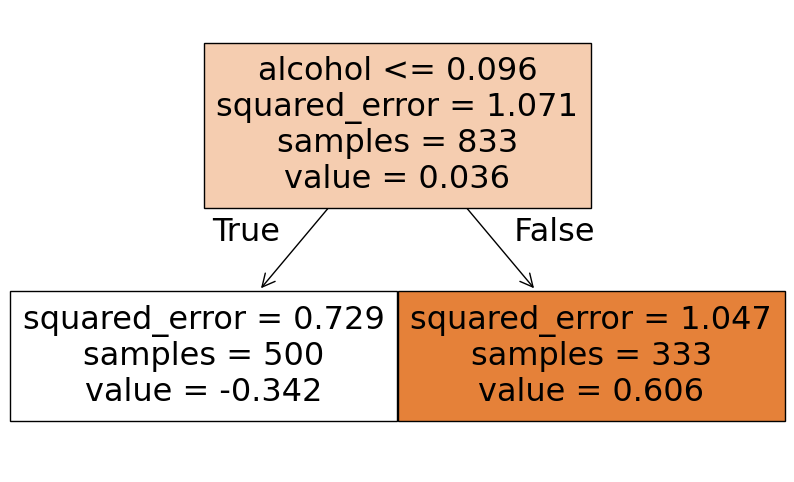

In [32]:
from sklearn import tree
plt.figure(figsize=(10, 6))

# Visualize one of the trees from the trained Random Forest model
_ = tree.plot_tree(trained_model.estimators_[0], feature_names=x_columns, filled=True)

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dc6b226b-1995-49c5-aea0-aba8cc7bd83f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>